In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import datetime
from tabulate import tabulate
from datetime import datetime, timedelta, timezone

import peakshaving 
import arbitrage 
import backup


   Sizing Battery Storage Tool

1. Peak-Shaving
2. Energy Arbitrage
3. Backup energy

Select an option:
2

Time interval between 18:00 and 22:00 with a peak reduction of 20 %



   Which is the chemistry desired of the battery
1. Lithium NMC
2. Lithium LFP
3. Lithium LTO
4. Vanadium
5. NaS

Select an option:
1
+---------------------+-------------------+-----------+------------------+-----------------+
| Category            | Range Discharge   |   #Cycles |   Hours per year |   Days per year |
+=====================+===================+===========+==================+=================+
| Full cycles         | 90-100%           |      31   |              155 |              31 |
+---------------------+-------------------+-----------+------------------+-----------------+
| High-Partial cycles | 70-90%            |     214   |             1070 |             214 |
+---------------------+-------------------+-----------+------------------+-----------------+
| Medium cycles       | 40-70%       

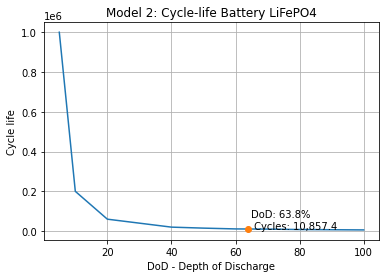

According to this model the number of cycles are: 10857.4
with this considerations the years are: 14.87 with a degradation of 0.688 % per year
the capacity available at the end of the first year is 99.31 %
This model was created considering articles about lithium batteries.

   Degradation comparison


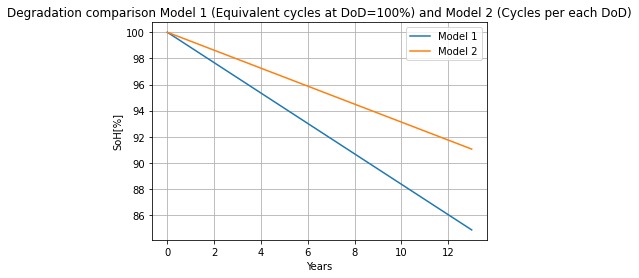

   Results
+-------------------------+-------------+---------+
| Parameter               | Model 1     | Model 2 |
+-------------------------+-------------+---------+
| Battery Power [kW]      | 353.2       | 353.2   |
+-------------------------+-------------+---------+
| Battery Energy [kWh]    | 3102.0      | 3087.4  |
+-------------------------+-------------+---------+
| Hours [h]               | 5           | 5       |
+-------------------------+-------------+---------+
| Degradation per year[%] | 1.164       | 0.688   |
+-------------------------+-------------+---------+
| Years                   | 17.2        | 14.9    |
+-------------------------+-------------+---------+
| Chemical                | Lithium NMC | LiFePO4 |
+-------------------------+-------------+---------+
| Factor correction       | 1.756       | 1.748   |
+-------------------------+-------------+---------+
Follow considerations:
Grow of the load =  25 %
Discharge losses =  10 %


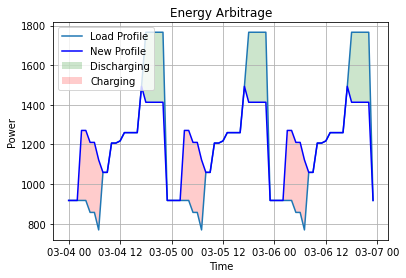

In [2]:
df = pd.read_csv('Test_load.csv') #to read the file
df = df[3:] #to erase the first 3 rows
df1 = df.reset_index(drop=True) #to have a new index
df1.columns = ["Data"] #to asing name
df1["Data"] = df1["Data"].str.split(";", n = 1, expand = False) # to separate the values
df1[['Data','Power']] = pd.DataFrame(df1.Data.tolist(), index= df1.index) #to put the values in two columns
df1["Data"]=pd.date_range("01/01/2022 00:00", periods=8760, freq='h') #to put the values in an according date time
df1["Power"]=pd.to_numeric(df1.Power) #to convert the power values into float
df1 = df1.fillna(0)

print("=====================================")
print("   Sizing Battery Storage Tool")
print("=====================================\n")
print('1. Peak-Shaving\n2. Energy Arbitrage\n3. Backup energy\n')
print('Select an option:')

opt=int(input(''))
if (opt==1):
    print('')
    peakshaving.peak_shaving(df1)
elif(opt==2):
    print('')
    arbitrage.arb(df1)
elif(opt==3):
    print('')
    backup.backup(df1)
else:
    print("Option no valid")